# 匯入套件

In [1]:
pip install mpl_finance

In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2021-04-20 00:01:16--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-04-20 00:01:16--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://iweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-04-20 00:01:16--  https://iweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving iweb.dl.sourceforge.ne

In [3]:
import datetime
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_finance as mpf
%matplotlib inline
import seaborn as sns
import talib

# 目標資訊

In [4]:
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,4,19)
stocklist = ['1101.TW','1102.TW','1103.TW','1104.TW','1108.TW','1109.TW','1110.TW']

In [5]:
def info(target):
    df_stock = web.DataReader(target,'yahoo',start,end)
    df_stock.index = df_stock.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 
    return df_stock
def startlowNhigh(stockname,df):
    lowdate = df["Low"][stockname].idxmin()
    lowprice = min(df["Low"][stockname])
    highdate = df["High"][stockname].loc[df["Low"][stockname].idxmin():].idxmax()
    highprice = max(df["High"][stockname].loc[df["Low"][stockname].idxmin():])
    roi = float((highprice-lowprice)/lowprice)
    output = list((stockname,lowdate,highdate,roi))
    return output
def endlowNhigh(stockname,df):
    lowdate = df["Low"][stockname].loc[:df["Low"][stockname].idxmax()].idxmin()
    lowprice = min(df["Low"][stockname].loc[:df["Low"][stockname].idxmax()])
    highdate = df["High"][stockname].idxmax()
    highprice = max(df["High"][stockname])
    roi = float((highprice-lowprice)/lowprice)
    output = list((stockname,lowdate,highdate,roi))
    return output
def df():
    data=[['stock', 'start', 'end', 'roi']]
    temp = info(stocklist)
    for idx in stocklist:  
        data.append(startlowNhigh(idx,temp))
        data.append(endlowNhigh(idx,temp))
    new_df = pd.DataFrame(data[1:], columns=data[0])
    return new_df
def main():
    data = df()
    for final in range(len(data)):
        if  data.iloc[final]['roi']==max(data['roi']):
            return data.iloc[final]
def visualize(stock):
    print(stock)
    onlystock = stock.stock
    target = info(onlystock)
    fig = plt.figure(figsize=(24, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xticks(range(0, len(target.index), 10))
    ax.set_xticklabels(target.index[::10])
    mpf.candlestick2_ochl(ax, target['Open'], target['Close'], target['High'],target['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
    sma_10 = talib.SMA(np.array(target['Close']), 10)
    sma_30 = talib.SMA(np.array(target['Close']), 30)
    # plt.xticks(rotation=90)
    plt.rcParams['font.sans-serif']=['DejaVu Sans']
    ax.plot(sma_10, label='10MA')
    ax.plot(sma_30, label='30MA')
    plt.title(onlystock)
    ax.legend()

# 執行程式

stock       1108.TW
start    2021-01-20
end      2021-04-19
roi        0.674641
Name: 8, dtype: object


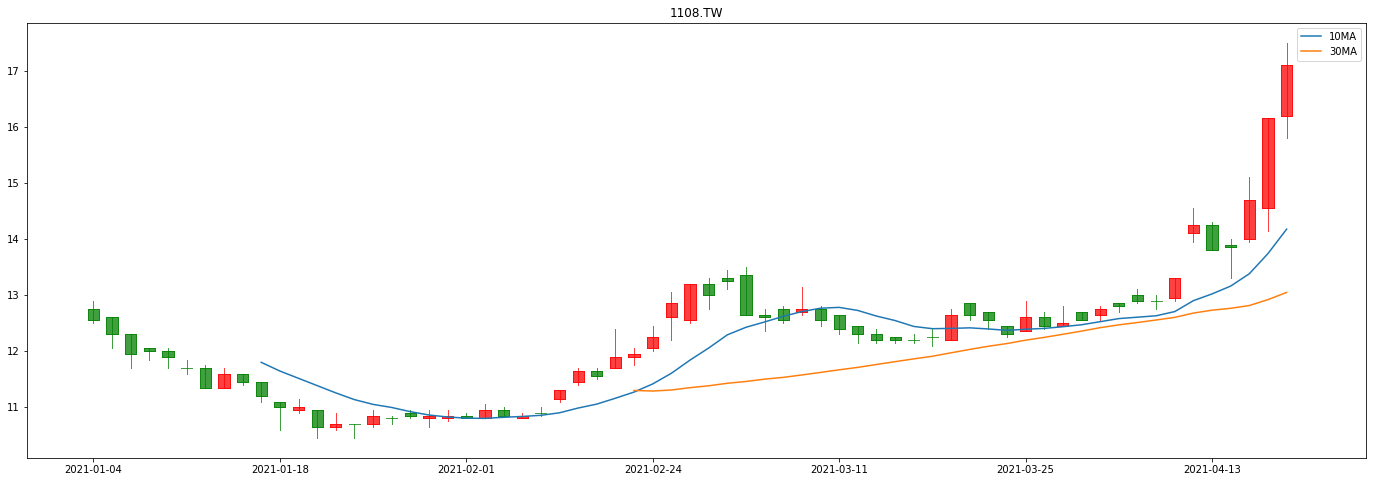

In [6]:
visualize(main())